<a href="https://colab.research.google.com/github/mariap13/CMSC320-FinalProject/blob/main/CMSC320_Final_Project_MP_KRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Baltimore City Crime Data
Fall 2024 Data Science Project
Maria Pacheco, Kelly Turner
### Contributions:
* *Project Idea:* Kelly Turner
* *Dataset Curation and Preprocessing:* Kelly Turner, Maria Pacheco
* *Data Exploration and Summary Statistics:* Maria Pacheco, Kelly Turner
* *ML Algorithm Design/Development:*
* *ML Algorithm Training and Test Data Analysis:*
* *Visualization, Result Analysis, Conclusion:*
* *Final Tutorial Report Creation:*
* *Additional:*

## Introduction
 Our aim with this project is to reveal trends in major crimes committed in Baltimore City, and the impact that the nature of the crimes, locations of incidents, and the gender of the perpetrators have on frequency of crime in the city. <br />

## Questions (brainstorm)
* What are the projected rates of major crime in different districts for Baltimore in the next 5 to 10 years, based on the given data? Model to use: Linear Regression
* Visualize concentrations of crimes for each 5(?) year span until 2024, then maybe create visualizations of the ML predictions?
https://developers.arcgis.com/python/latest/guide/visualizing-data-with-the-spatially-enabled-dataframe/
* What are the hour breakdowns for the most prevalent crimes (?)



## Data Preprocessing

For this project we will be pulling data from the Open Data Baltimore API, specifically the major crime dataset featured in the link below, and loading it into a dataframe for further analysis.<br /> https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/about <br>
Link to data (crime code, inside_outside, location, total_incidents columns not included): https://services1.arcgis.com/UWYHeuuJISiGmgXx/arcgis/rest/services/Part1_Crime_Beta/FeatureServer/0/query?where=1%3D1&outFields=CrimeDateTime,Description,Weapon,Post,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,CCNumber&outSR=4326&f=geojson<br />**Please download the CSV file under download. (file is too large to place in repo)**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# CODE FOR READING IN DIRECTLY FROM API
#import requests
#import json
#response = json.loads(requests.get("https://services1.arcgis.com/UWYHeuuJISiGmgXx/arcgis/rest/services/Part1_Crime_Beta/FeatureServer/0/query?where=1%3D1&outFields=CrimeDateTime,Description,Weapon,Post,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,CCNumber&outSR=4326&f=geojson").text)['features']

#df = pd.DataFrame.from_dict(pd.json_normalize(response), orient='columns')
#df.head(20)

In [128]:
# CODE FOR READING DATA INTO CSV FILE
df = pd.read_csv('/content/Part1_Crime_Beta_5307206680000182585.csv', on_bad_lines='skip')
pd.options.display.max_columns = None
df.info()

<ipython-input-128-efc4d1030c53>:2: DtypeWarning: Columns (5,7,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Part1_Crime_Beta_5307206680000182585.csv', on_bad_lines='skip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637638 entries, 0 to 637637
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            637638 non-null  int64  
 1   CCNumber         637638 non-null  object 
 2   CrimeDateTime    637638 non-null  object 
 3   CrimeCode        637638 non-null  object 
 4   Description      637638 non-null  object 
 5   Inside_Outside   37329 non-null   object 
 6   Weapon           166550 non-null  object 
 7   Post             629500 non-null  object 
 8   Gender           535773 non-null  object 
 9   Age              515015 non-null  float64
 10  Race             606881 non-null  object 
 11  Ethnicity        110374 non-null  object 
 12  Location         633915 non-null  object 
 13  Old_District     566413 non-null  object 
 14  New_District     63167 non-null   object 
 15  Neighborhood     628708 non-null  object 
 16  Latitude         636310 non-null  floa

In [129]:
pd.options.display.max_columns = None
df.head(20)

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,1,24I06919,9/12/2024 3:00:00 PM,7A,AUTO THEFT,O,NaN,921.0,F,38.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,SEAGULL AVE,NaN,SOUTHERN,CHERRY HILL,39.246302,-76.620199,"(39.246302,-76.620199)",STREET ...,1,-76.620199,39.246302
1,2,24I35665,9/12/2024 11:25:00 AM,6J,LARCENY,I,NaN,511.0,F,37.0,WHITE,NOT_HISPANIC_OR_LATINO,3400 ROLAND AVE,NaN,NORTHERN,HAMPDEN,39.328993,-76.632433,"(39.328993,-76.632433)",OTHER/RESIDENTIAL ...,1,-76.632433,39.328993
2,3,24I04049,9/12/2024 7:52:00 PM,6C,LARCENY,I,NaN,331.0,NaN,NaN,NaN,,3400 BELAIR RD,NaN,EASTERN,BELAIR-EDISON,39.322774,-76.572001,"(39.322774,-76.572001)",WHOLESALEDISC. STOR ...,1,-76.572001,39.322774
3,4,24I04056,9/12/2024 7:50:00 PM,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,835.0,F,26.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,1100 W BALTIMORE ST,NaN,SOUTHWEST,POPPLETON,39.288718,-76.635845,"(39.288718,-76.635845)",CONVENIENCE STORE ...,1,-76.635845,39.288718
4,5,24I04058,9/12/2024 8:00:00 PM,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,932.0,F,NaN,WHITE,NOT_HISPANIC_OR_LATINO,1200 CLEVELAND ST,NaN,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.280023,-76.632864,"(39.280023,-76.632864)",OTHER/RESIDENTIAL ...,1,-76.632864,39.280023
5,6,24I04058,9/12/2024 8:00:00 PM,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,932.0,F,12.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,1200 CLEVELAND ST,NaN,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.280023,-76.632864,"(39.280023,-76.632864)",OTHER/RESIDENTIAL ...,1,-76.632864,39.280023
6,7,24I04069,9/12/2024 8:12:00 PM,6F,LARCENY FROM AUTO,O,NaN,114.0,F,37.0,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,N CALVERT ST,NaN,CENTRAL,DOWNTOWN,39.290114,-76.612248,"(39.290114,-76.612248)",SHED/GARAGE ...,1,-76.612248,39.290114
7,8,24I04389,9/12/2024 5:00:00 PM,7A,AUTO THEFT,I,NaN,434.0,M,46.0,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,4400 GLENARM AVE,NaN,NORTHEAST,CEDMONT,39.344410,-76.538871,"(39.34441,-76.538871)",OTHER/RESIDENTIAL ...,1,-76.538871,39.344410
8,9,24I04403,9/12/2024 8:00:00 PM,6G,LARCENY,O,NaN,923.0,F,73.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,2500 S PACA ST,NaN,SOUTHERN,MOUNT WINANS,39.263237,-76.644912,"(39.263237,-76.644912)",STREET ...,1,-76.644912,39.263237
9,10,24I05708,9/12/2024 12:55:00 PM,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,913.0,F,29.0,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,1200 CAMBRIA ST,NaN,SOUTHERN,CURTIS BAY,39.232843,-76.593317,"(39.232843,-76.593317)",SCHOOL ...,1,-76.593317,39.232843


### Description of the Crime Data columns:
*   `RowID` - The unique ID for each entry in the dataset
*   `CCNumber` -
*   `CrimeCode` - The police Crime Code assigned to the crime
*   `Description` - The type of crime that was committed
*   `Inside_Outside` - Describes whether the crime occured indoors or outdoors
*   `Weapon` - Described what weapon was used, if any, in the crime
*   `Post` - The police post area the crime occured in
*   `Gender` - The gender ('Female', 'Male', 'Undefined') of the perpetrator
*   `Age` - The age of the perpetrator
*   `Race` - The race of the perpetrator
*   `Ethnicity` - The ethnicity of the perpetrator
*   `Location` - The address of the crime
*   `Old_District` - The district where the crime occured, according to the system used by Baltimore city before July 2023
*   `New_District` - The district where the crime occured, according to the system used by Baltimore city after July 2023
*   `Neighborhood` - The neighborhood where the crime occured
*   `Latitude` - Latitude coordinate of the crime location
*   `Longitude` - Longitude coordinate of the crime location
*   `GeoLocation` - Coordinates of the crime location to be used by ArcGIS
*   `PremiseType` - Brief description of the setting where the crime occured, for example, "Convenience store"
*   `Total_Incidents` - The number of incidents covered by the entry (this is '1' for every entry)




## Data Parsing



First, the column names for the dataframe were adjusted after being read in with "properties." prepended to each in the json file.

In [130]:
# FOR DATA PARSED DIRECTLY FROM API
#df.drop('type', axis=1)
#df.drop('geometry.type', axis=1)
#print(df.columns)

#def columns(name):
#  properties = "properties."
#  geometry = "geometry."
#  if name.startswith(properties):
#    return name[len(properties):]
#  elif name.startswith(geometry):
#    return name[len(geometry):]
#  else:
#    return name

#df.columns = [columns(name) for name in df.columns]
#print(df.columns)

The 'Age' column was set to integers from string values, and the frequencies of all unique ages in the column were printed to display the distribution of ages. The null ('None') values in the Age column were set to zero, and going forward we didn't include these zeroes in calculations on age distribution.

In [131]:
crime_data = df.copy()
# Convert all records in Age column to integer type
print(crime_data['Age'].isna().sum(), len(crime_data['Age']))
crime_data['Age'] = crime_data['Age'].fillna(0)
print(crime_data['Age'].isna().sum(), len(crime_data['Age']))
#crime_data.Age = crime_data.Age.convert_dtypes(convert_integer=True)
crime_data['Age'] = crime_data['Age'].astype(int)
# Convert all ages to positive values
crime_data.Age = crime_data.Age.abs()
# Look at the frequency of each age that is listed in this dataset
print(crime_data.Age.value_counts().sort_index())

122623 637638
0 637638
Age
0       122915
1          344
2          274
3          239
4          328
         ...  
7135         3
7147         1
7692         1
7979         1
8251         1
Name: count, Length: 145, dtype: int64


Read in from the JSON file format, the datetime column was set as the milliseconds that had passed from some start datetime.  <br />
In order to avoid errors with future calculations/manipulations, the 'CrimeDateTime' column was converted to datetime, and dates that were set to NaN due to being out of range (ex/a crime that happened in 1557) were removed. The column was then separated into a 'Date' column and a 'Time' column.

In [132]:
# FOR DATA PARSED DIRECTLY FROM API
#import datetime
#crime_data.sort_values('CrimeDateTime')
#crime_data["Converted_CrimeDateTime"] = pd.to_datetime(crime_data['CrimeDateTime'], unit='ms')
#print(crime_data["Converted_CrimeDateTime"].head(20))

In [133]:
# Convert all records in CrimeDateTime column to datetime format
crime_data.CrimeDateTime = pd.to_datetime(crime_data.CrimeDateTime, errors='coerce', format='mixed')
# Drop rows with null values in CrimeDateTime
crime_data.dropna(axis=0, subset=['CrimeDateTime'], inplace=True)
# Check result of the dropna
print("Null 'CrimeDateTime' values:", str(crime_data.CrimeDateTime.isna().sum()))
# Create a 'Date' column with just the date, and a 'Time' column with just the time, from each record in CrimeDateTime
crime_data['Date'] = [d.date() for d in crime_data['CrimeDateTime']]
crime_data['Time'] = [d.time() for d in crime_data['CrimeDateTime']]
# Check these new columns
print("'Date' Column: ", crime_data['Date'].head())
print("'Time' Column: ", crime_data['Time'].head())

Null 'CrimeDateTime' values: 0
'Date' Column:  0    2024-09-12
1    2024-09-12
2    2024-09-12
3    2024-09-12
4    2024-09-12
Name: Date, dtype: object
'Time' Column:  0    15:00:00
1    11:25:00
2    19:52:00
3    19:50:00
4    20:00:00
Name: Time, dtype: object


In [134]:
# Drop the original CrimeDateTime column
crime_data = crime_data.drop('CrimeDateTime', axis=1)
crime_data.columns
# Print min and max dates for the data
print(crime_data.Date.max())
print(crime_data.Date.min())


2024-10-28
1720-08-14


The Baltimore Police Department redrew the police districts and started labeling crimes with the new system on 07/09/2023.  To account for this change, we split the data on this date of the district change.  Crimes committed on and after 07/09/2023 kept the 'New_District' column as their district and crimes committed before then kept the 'Old_District' column as their district.

In [176]:
import datetime
split_date = datetime.date(2023,7,9)
# Create Dataframe for crime records since 07/09/2023
data_new_district = crime_data.loc[crime_data['Date'] >= split_date]
# Create Dataframe for crime records before 07/09/2023
data_old_district = crime_data.loc[crime_data['Date'] < split_date]
# Drop the 'New_District' column from the data before 07/09/2023
data_old_district.drop('New_District', axis=1, inplace=True)
# Drop the 'Old_District' column from the data on and after 07/09/2023
data_new_district.drop('Old_District', axis=1, inplace=True)
# Check that this worked by printing the min and max dates for each dataframe
#print("New district data most recent date:",data_new_district.Date.max())
#print("Old district data most recent date:",data_old_district.Date.max())
#print("Null district values in data_new_district:", data_new_district['New_District'].isna().sum())
#print("Total rows in new district dataset:", data_new_district.shape[0])


<ipython-input-176-77d3425e4b20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old_district.drop('New_District', axis=1, inplace=True)
<ipython-input-176-77d3425e4b20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_district.drop('Old_District', axis=1, inplace=True)


In [177]:
# Impute the old district half of the dataset
print("Null district values in data_old_district:", data_old_district['Old_District'].isna().sum())
print("Total rows in data_old_district dataset:", data_old_district.shape[0])

# Get the subset of old_district_dataset that does NOT have district but DOES have neighborhood
no_district = data_old_district[data_old_district['Old_District'].isna() & data_old_district['Neighborhood'].notnull()]
print("Total rows in no_district dataset:", no_district.shape[0])
print("Null districts in no_district subset before imputation:", no_district['Old_District'].isna().sum())
# Impute null values in Old_District for no_district
neighborhoods_per_district = data_old_district.groupby('Neighborhood')['Old_District'].agg(lambda x: x.value_counts().idxmax())
neighborhoods_per_district = neighborhoods_per_district.to_dict()
no_district['Old_District'] = no_district.apply(lambda row: neighborhoods_per_district[row['Neighborhood']] if pd.isna(row['Old_District']) else row['Old_District'], axis=1)
print("Null districts in no_district subset after imputation:", no_district['Old_District'].isna().sum())


# Get the subset of old_district_dataset that DOES have district but does NOT have neighborhood
no_neighborhood = data_old_district[data_old_district['Old_District'].notnull() & data_old_district['Neighborhood'].isna()]
print("Total rows in no_neighborhood dataset:", no_neighborhood.shape[0])
print("Null districts in no_neighborhood subset before imputation:", no_neighborhood['Neighborhood'].isna().sum())
# Impute null values in Neighborhood for no_neighborhood
districts_per_neighborhood = data_old_district.groupby('Old_District')['Neighborhood'].agg(lambda x: x.value_counts().idxmax())
districts_per_neighborhood = districts_per_neighborhood.to_dict()
no_neighborhood['Neighborhood'] = no_neighborhood.apply(lambda row: districts_per_neighborhood[row['Old_District']] if pd.isna(row['Neighborhood']) else row['Neighborhood'], axis=1)
print("Null districts in no_neighborhood subset after imputation:", no_neighborhood['Neighborhood'].isna().sum())


# Replace rows in old_district_dataset with their imputed versions
data_old_district.update(no_neighborhood)
data_old_district.update(no_district)
# Remove the records that have both neighborhood and district missing
data_old_district.dropna(subset=['Neighborhood', 'Old_District'], inplace=True)

print("Records with null district field in new district dataset:\n",data_old_district['Old_District'].isna().sum())
print("Records with null neighborhood field in new district dataset:\n",data_old_district['Neighborhood'].isna().sum())

# Rename Old_District as District
data_old_district.rename(columns={'Old_District': 'District'}, inplace=True)

Null district values in data_old_district: 7945
Total rows in data_old_district dataset: 574320
Total rows in no_district dataset: 342
Null districts in no_district subset before imputation: 342


<ipython-input-177-3df45decddd3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_district['Old_District'] = no_district.apply(lambda row: neighborhoods_per_district[row['Neighborhood']] if pd.isna(row['Old_District']) else row['Old_District'], axis=1)


Null districts in no_district subset after imputation: 0
Total rows in no_neighborhood dataset: 885
Null districts in no_neighborhood subset before imputation: 885


<ipython-input-177-3df45decddd3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_neighborhood['Neighborhood'] = no_neighborhood.apply(lambda row: districts_per_neighborhood[row['Old_District']] if pd.isna(row['Neighborhood']) else row['Neighborhood'], axis=1)


Null districts in no_neighborhood subset after imputation: 0
Records with null district field in new district dataset:
 0
Records with null neighborhood field in new district dataset:
 0


<ipython-input-177-3df45decddd3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old_district.dropna(subset=['Neighborhood', 'Old_District'], inplace=True)
<ipython-input-177-3df45decddd3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_old_district.rename(columns={'Old_District': 'District'}, inplace=True)


This same imputation process was repeated for the new_district_data section.

In [178]:
# Impute the old district half of the dataset
print("Null district values in data_new_district:", data_new_district['New_District'].isna().sum())
print("Total rows in data_new_district dataset:", data_new_district.shape[0])

# Get the subset of old_district_dataset that does NOT have district but DOES have neighborhood
no_district = data_new_district[data_new_district['New_District'].isna() & data_new_district['Neighborhood'].notnull()]
print("Total rows in no_district dataset:", no_district.shape[0])
print("Null districts in no_district subset before imputation:", no_district['New_District'].isna().sum())
# Impute null values in Old_District for no_district
neighborhoods_per_district = data_new_district.groupby('Neighborhood')['New_District'].agg(lambda x: x.value_counts().idxmax())
neighborhoods_per_district = neighborhoods_per_district.to_dict()
no_district['New_District'] = no_district.apply(lambda row: neighborhoods_per_district[row['Neighborhood']] if pd.isna(row['New_District']) else row['New_District'], axis=1)
print("Null districts in no_district subset after imputation:", no_district['New_District'].isna().sum())


# Get the subset of old_district_dataset that DOES have district but does NOT have neighborhood
#no_neighborhood = data_new_district[data_new_district['New_District'].notnull() & data_new_district['Neighborhood'].isna()]
#print("Total rows in no_neighborhood dataset:", no_neighborhood.shape[0])
#print("Null districts in no_neighborhood subset before imputation:", no_neighborhood['Neighborhood'].isna().sum())
# Impute null values in Neighborhood for no_neighborhood
#districts_per_neighborhood = data_new_district.groupby('New_District')['Neighborhood'].apply(lambda x: x.value_counts().idxmax())
#districts_per_neighborhood = districts_per_neighborhood.to_dict()
#no_neighborhood['Neighborhood'] = no_neighborhood.apply(lambda row: districts_per_neighborhood[row['New_District']] if pd.isna(row['Neighborhood']) else row['Neighborhood'], axis=1)
#print("Null districts in no_neighborhood subset after imputation:", no_neighborhood['Neighborhood'].isna().sum())


# Replace rows in data_new_district with their imputed versions
data_new_district.update(no_district)
#data_new_district.update(no_neighborhood)
# Remove the records that have both neighborhood and district missing
data_new_district.dropna(subset=['New_District', 'Neighborhood'], inplace=True)
print("Records with null district field in new district dataset:\n",data_new_district['New_District'].isna().sum())
print("Records with null neighborhood field in new district dataset:\n",data_new_district['Neighborhood'].isna().sum())

# Rename New_District as District
data_new_district.rename(columns={'New_District': 'District'}, inplace=True)

Null district values in data_new_district: 147
Total rows in data_new_district dataset: 63314
Total rows in no_district dataset: 44
Null districts in no_district subset before imputation: 44
Null districts in no_district subset after imputation: 0
Records with null district field in new district dataset:
 0
Records with null neighborhood field in new district dataset:
 0


<ipython-input-178-16ca75f4eb2d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_district['New_District'] = no_district.apply(lambda row: neighborhoods_per_district[row['Neighborhood']] if pd.isna(row['New_District']) else row['New_District'], axis=1)
<ipython-input-178-16ca75f4eb2d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_district.dropna(subset=['New_District', 'Neighborhood'], inplace=True)
<ipython-input-178-16ca75f4eb2d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

To update the original dataframe crime_data, it was assigned to the combination of these imputed halves (data_old_district and data_new_district).  crime_data now has one column called 'District', with no missing values, that reflects new districts in records since 07/09/2023 and reflects old districts in records before 07/09/2023.

In [181]:
crime_data = pd.concat([data_new_district, data_old_district])
crime_data.head()

,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y,Date,Time
0,1,24I06919,7A,AUTO THEFT,O,NaN,921.0,F,38,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,SEAGULL AVE,SOUTHERN,CHERRY HILL,39.246302,-76.620199,"(39.246302,-76.620199)",STREET ...,1,-76.620199,39.246302,2024-09-12,15:00:00
1,2,24I35665,6J,LARCENY,I,NaN,511.0,F,37,WHITE,NOT_HISPANIC_OR_LATINO,3400 ROLAND AVE,NORTHERN,HAMPDEN,39.328993,-76.632433,"(39.328993,-76.632433)",OTHER/RESIDENTIAL ...,1,-76.632433,39.328993,2024-09-12,11:25:00
2,3,24I04049,6C,LARCENY,I,NaN,331.0,NaN,0,NaN,,3400 BELAIR RD,EASTERN,BELAIR-EDISON,39.322774,-76.572001,"(39.322774,-76.572001)",WHOLESALEDISC. STOR ...,1,-76.572001,39.322774,2024-09-12,19:52:00
3,4,24I04056,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,835.0,F,26,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,1100 W BALTIMORE ST,SOUTHWEST,POPPLETON,39.288718,-76.635845,"(39.288718,-76.635845)",CONVENIENCE STORE ...,1,-76.635845,39.288718,2024-09-12,19:50:00
4,5,24I04058,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,932.0,F,0,WHITE,NOT_HISPANIC_OR_LATINO,1200 CLEVELAND ST,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.280023,-76.632864,"(39.280023,-76.632864)",OTHER/RESIDENTIAL ...,1,-76.632864,39.280023,2024-09-12,20:00:00


We removed the x and y columns since we don't plan on using them to map data points **(may change)**.  The Total_incidents column was also removed as it only redundantly recorded a single instance for each crime event in the dataset.

In [182]:
#remove x, y, total_incidents columns
crime_data.drop(['Total_Incidents'], axis=1, inplace=True)
crime_data.head()

,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,x,y,Date,Time
0,1,24I06919,7A,AUTO THEFT,O,NaN,921.0,F,38,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,SEAGULL AVE,SOUTHERN,CHERRY HILL,39.246302,-76.620199,"(39.246302,-76.620199)",STREET ...,-76.620199,39.246302,2024-09-12,15:00:00
1,2,24I35665,6J,LARCENY,I,NaN,511.0,F,37,WHITE,NOT_HISPANIC_OR_LATINO,3400 ROLAND AVE,NORTHERN,HAMPDEN,39.328993,-76.632433,"(39.328993,-76.632433)",OTHER/RESIDENTIAL ...,-76.632433,39.328993,2024-09-12,11:25:00
2,3,24I04049,6C,LARCENY,I,NaN,331.0,NaN,0,NaN,,3400 BELAIR RD,EASTERN,BELAIR-EDISON,39.322774,-76.572001,"(39.322774,-76.572001)",WHOLESALEDISC. STOR ...,-76.572001,39.322774,2024-09-12,19:52:00
3,4,24I04056,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,835.0,F,26,BLACK_OR_AFRICAN_AMERICAN,NOT_HISPANIC_OR_LATINO,1100 W BALTIMORE ST,SOUTHWEST,POPPLETON,39.288718,-76.635845,"(39.288718,-76.635845)",CONVENIENCE STORE ...,-76.635845,39.288718,2024-09-12,19:50:00
4,5,24I04058,4E,COMMON ASSAULT,I,PERSONAL_WEAPONS,932.0,F,0,WHITE,NOT_HISPANIC_OR_LATINO,1200 CLEVELAND ST,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.280023,-76.632864,"(39.280023,-76.632864)",OTHER/RESIDENTIAL ...,-76.632864,39.280023,2024-09-12,20:00:00


While analyzing the 'Weapon' feature it was realized that multiple descriptions were incomplete versions of existing descriptions, for example, 'AUTOMATIC_FI' was the incomplete version of 'AUTOMATIC_FIREARM'.  To make sure these incomplete records fell under the right categories, each was replaced by its complete counterpart.

In [183]:
# Clean Weapon feature
print("Weapons before editing:", crime_data['Weapon'].unique(), '\n')
crime_data.replace("KNIFE_CUTTIN", "KNIFE_CUTTING_INSTRUMENT", inplace=True)
crime_data.replace("AUTOMATIC_FI", "AUTOMATIC_FIREARM", inplace=True)
crime_data.replace("AUTOMATIC_RI", "AUTOMATIC_RIFLE", inplace=True)
crime_data.replace("AUTOMATIC_SH", "AUTOMATIC_SHOTGUN", inplace=True)
crime_data.replace("AUTOMATIC_HA", "AUTOMATIC_HANDGUN", inplace=True)
crime_data.replace('PERSONAL_WEA', 'PERSONAL_WEAPON', inplace=True)
crime_data.replace('OTHER_FIREAR', 'FIREARM', inplace=True)
crime_data.replace('OTHER_FIREARM', 'FIREARM', inplace=True)
crime_data.replace('PERSONAL_WEAPONS', 'PERSONAL_WEAPON', inplace=True)
crime_data.replace('FIRE_INCENDI', 'FIRE_INCENDIARY_DEVICE', inplace=True)
crime_data.replace('MOTOR_VEHICL', 'MOTOR_VEHICLE_VESSEL', inplace=True)
crime_data.replace('DRUGS_NARCOT', 'DRUGS_NARCOTICS_SLEEPING_PILLS', inplace=True)
crime_data.replace('Y', 'OTHER', inplace=True)
print("Weapons after editing:", crime_data['Weapon'].unique())

Weapons before editing: [nan 'PERSONAL_WEAPONS' 'OTHER' 'BLUNT_OBJECT' 'KNIFE_CUTTING_INSTRUMENT'
 'FIREARM' 'MOTOR_VEHICLE_VESSEL' 'KNIFE_CUTTIN' 'PERSONAL_WEA' 'HANDGUN'
 'UNKNOWN' 'ASPHYXIATION' 'RIFLE' 'AUTOMATIC_FIREARM' 'POISON'
 'EXPLOSIVES' 'FIRE_INCENDIARY_DEVICE' 'SHOTGUN'
 'DRUGS_NARCOTICS_SLEEPING_PILLS' 'OTHER_FIREARM' 'MOTOR_VEHICL' 'Y'
 'AUTOMATIC_FI' 'OTHER_FIREAR' 'KNIFE' 'FIRE' 'HANDS' 'AUTOMATIC_HA'
 'FIRE_INCENDI' 'AUTOMATIC_RI' 'AUTOMATIC_SH' 'DRUGS_NARCOT'] 

Weapons after editing: [nan 'PERSONAL_WEAPON' 'OTHER' 'BLUNT_OBJECT' 'KNIFE_CUTTING_INSTRUMENT'
 'FIREARM' 'MOTOR_VEHICLE_VESSEL' 'HANDGUN' 'UNKNOWN' 'ASPHYXIATION'
 'RIFLE' 'AUTOMATIC_FIREARM' 'POISON' 'EXPLOSIVES'
 'FIRE_INCENDIARY_DEVICE' 'SHOTGUN' 'DRUGS_NARCOTICS_SLEEPING_PILLS'
 'KNIFE' 'FIRE' 'HANDS' 'AUTOMATIC_HANDGUN' 'AUTOMATIC_RIFLE'
 'AUTOMATIC_SHOTGUN']


##Data Exploration and Summary Statistics
Once we cleaned features of the crime data, we examined trends within and across these features.


In [185]:
col_names = ['Description', 'Inside_Outside', 'Weapon', 'Gender', 'Age', 'Race', 'Ethnicity', 'District', 'Neighborhood', 'PremiseType', 'Description', 'Weapon']
for i in col_names:
  print("Unique values in", i, ": \t", crime_data[i].unique())
  print("Frequency of unique values in: ", crime_data[i].value_counts())

Unique values in Description : 	 ['AUTO THEFT' 'LARCENY' 'COMMON ASSAULT' 'LARCENY FROM AUTO' 'BURGLARY'
 'AGG. ASSAULT' 'ROBBERY' 'ROBBERY - COMMERCIAL' 'RAPE' 'SHOOTING'
 'HOMICIDE' 'ROBBERY - CARJACKING' 'ARSON']
Frequency of unique values in:  Description
LARCENY                 140316
COMMON ASSAULT          116008
BURGLARY                 82684
LARCENY FROM AUTO        76901
AGG. ASSAULT             72606
AUTO THEFT               61800
ROBBERY                  48388
ROBBERY - COMMERCIAL      7552
SHOOTING                  6973
ROBBERY - CARJACKING      5683
RAPE                      4294
HOMICIDE                  3742
ARSON                     2642
Name: count, dtype: int64
Unique values in Inside_Outside : 	 ['O' 'I' nan]
Frequency of unique values in:  Inside_Outside
I    20666
O    16321
Name: count, dtype: int64
Unique values in Weapon : 	 [nan 'PERSONAL_WEAPON' 'OTHER' 'BLUNT_OBJECT' 'KNIFE_CUTTING_INSTRUMENT'
 'FIREARM' 'MOTOR_VEHICLE_VESSEL' 'HANDGUN' 'UNKNOWN' 'ASPHYXIATI

###Detecting outliers in the data
Creating a box plot for the 'Age' column revealed that ages higher than 80 are considered outliers. Once this was discovered, we removed the outliers from the 'Age' column.<br />


8251


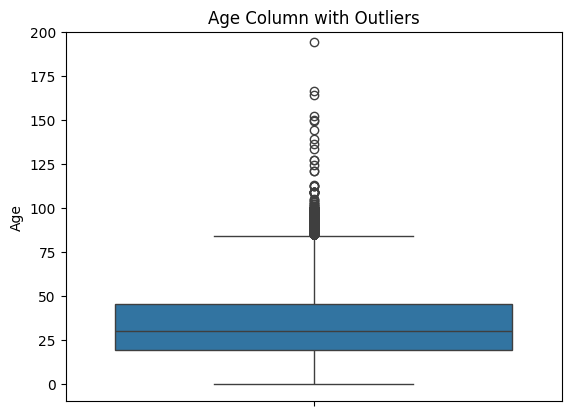

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(crime_data['Age'])
print(str(crime_data['Age'].max()))
plt.ylim(-10, 200)
plt.title(f'Age Column with Outliers')
plt.show()

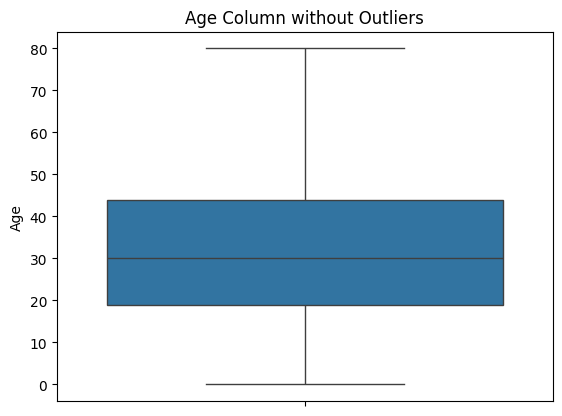

In [187]:
removed_outliers = crime_data[crime_data['Age'] <= 80]
sns.boxplot(removed_outliers['Age'])
plt.title(f'Age Column without Outliers')
plt.show()
index_names = crime_data[crime_data['Age'] > 80].index
df = crime_data.copy()
df.drop(index_names, inplace=True)#drop outlier ages from the dataset

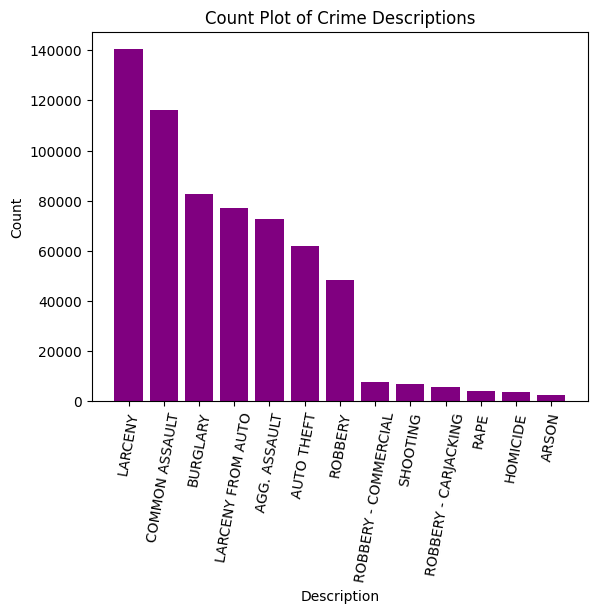

In [188]:
descrip_counts = crime_data['Description'].value_counts()

plt.bar(descrip_counts.index, descrip_counts, color='purple')
plt.title('Count Plot of Crime Descriptions')
plt.xlabel('Description')
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.show()

###Hypothesis Test 1: Chi-Squared Test
**Null Hypothesis:** The district where a crime was committed will have an impact of the likelihood of the nature (description) of the crime.<br />
**Alternate Hypothesis:** The district where a crime was committed will not have an impact of the likelihood of the nature (description) of the crime.<br />
For this test we used a Chi-Squared test, since both variables are categorical.

In [190]:
#Columns: district, description
contingency = pd.crosstab(crime_data.District, crime_data.Description)
contingency

Description,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,SHOOTING
District,,,,,,,,,,,,,
CENTRAL,7708,166,4754,6625,14560,244,21246,11603,529,6903,501,988,609
EASTERN,8111,260,4485,6390,12649,532,10467,5918,437,3858,395,549,1048
NORTHEAST,10251,463,11909,14747,16335,474,18382,10922,611,7724,951,1213,776
NORTHERN,5753,220,6222,9841,10029,237,17509,9436,427,4841,539,981,438
NORTHWEST,7487,346,7562,9524,10598,483,13186,6381,457,4695,824,858,729
SOUTHEAST,8236,227,6825,11013,14495,294,21573,15215,503,7870,608,1209,589
SOUTHERN,8111,330,7426,9220,12737,374,16735,8528,487,4950,673,640,746
SOUTHWEST,8584,359,7065,9135,13075,525,11988,5316,439,3898,642,626,952
WESTERN,8365,271,5552,6189,11530,579,9230,3582,404,3649,550,488,1086


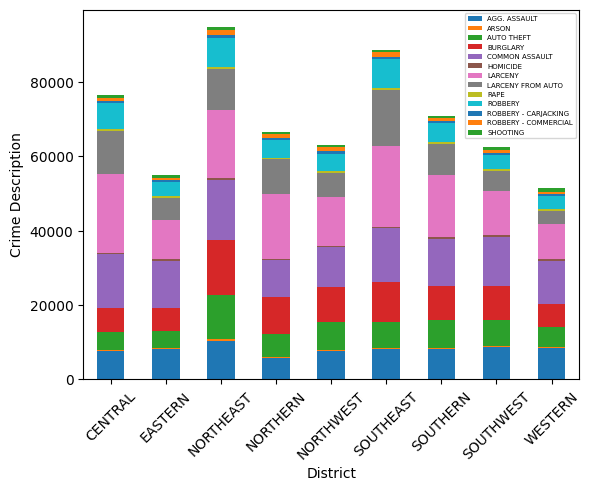

In [191]:
plt = contingency.plot.bar(rot=45, xlabel="District", ylabel="Crime Description", stacked=True).legend(prop={'size': 5})

In [192]:
import scipy.stats as stats
chi2_res = stats.chi2_contingency(contingency)
if chi2_res.pvalue < 0.05:
  print("Reject, p-value is", str(chi2_res.pvalue))
else:
  print("Fail to Reject, p-value is", str(chi2_res.pvalue))

Reject, p-value is 0.0


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. District does not have a significant impact on the likelihood of the nature (description) of the crime.<br /><br />
###Hypothesis Test 2: ANOVA
**Null Hypothesis:** The description of the crime and the weapon used do not significantly impact one another.<br />
**Alternate Hypothesis:** The description of the crime and the weapon used do significantly impact one another.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Group by 'Description' and 'Weapon'
grouped_description_weapon = crime_data.groupby(['Description', 'Weapon']).size().reset_index(name='Count')
print(grouped_description_weapon)

In [ ]:
sns.barplot(x='Description', y='Count', hue='Weapon', data=grouped_description_weapon)

plt.title('Group by Description and Weapon')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

In [ ]:
anova_data = [group['Count'].values for name, group in grouped_description_weapon.groupby('Description')]

#ANOVA
f_statistic, p_value = stats.f_oneway(*anova_data)

print("P-value:", p_value)

In [ ]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. Therefore, The description of the crime and the weapon used do significantly impact one another.

###Hypothesis Test 2a:

###Hypothesis Test 3: T-Test
**Null Hypothesis:**  There is no difference in the average age of male and female perpetrators. <br>
**Alternate Hypothesis:** There is a difference in the average age of male and female perpetrators. <br>
A T-Test was used to determine whether gender has a significant impact on the likelihood of being a criminal perpetrator.

In [ ]:
male_ages = df[(df['Gender'] == 'M')  & (df['Age'].notna())]['Age']
female_ages = df[(df['Gender'] == 'F')  & (df['Age'].notna())]['Age']
print(male_ages)
print(female_ages)

# t-test
t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)  # Use equal_var=False for Welch's t-test

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot([male_ages, female_ages], labels=['Male', 'Female'])
plt.title('Box Plot of Ages by Gender')
plt.ylabel('Age')
plt.grid()

plt.show()

In [ ]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. The t-test shows that there is a significant difference in the average ages of male and female perpetrators in this data.

Comparing property crime rate to the rate of other crimes over time

# Primary Analysis